In [27]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### Handling null values

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Univariate Analysis

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [9]:
df['User_ID'].nunique()

5891

In [10]:
df['Product_ID'].nunique()

3623

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df['Purchase'].sum()

5017668378

In [14]:
df['Purchase'].mean()

9333.859852635065

# Bivariate Analysis

### Gender

In [15]:
data = pd.DataFrame({'Ratio' : (len(df[df['Gender'] == 'F']),len(df[df['Gender'] == 'M']))},index = ['Female','male'])

<Axes: ylabel='Ratio'>

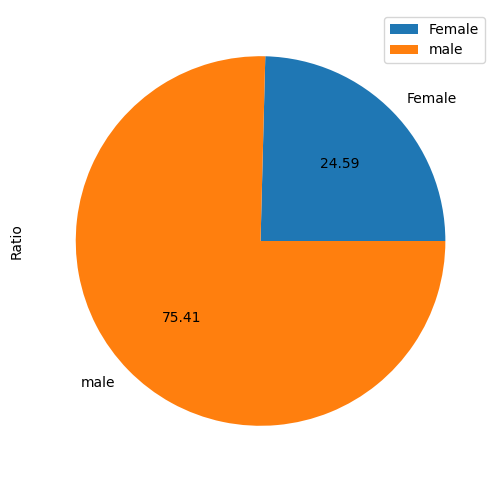

In [16]:
data.plot(y='Ratio',kind ='pie',autopct = "%.2f",figsize=(6,6))

<Axes: title={'center': 'Total Spend vs Gender'}, ylabel='Purchase'>

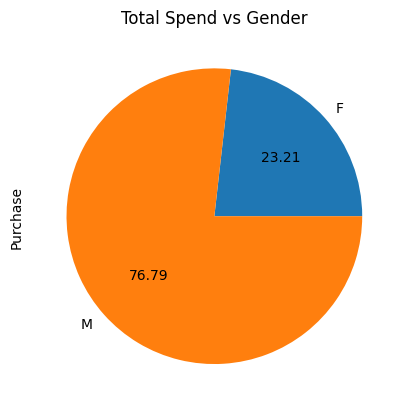

In [23]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',autopct ='%.2f',title="Total Spend vs Gender")

In [25]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

<Axes: title={'center': 'Avg spend per Gender'}, ylabel='Purchase'>

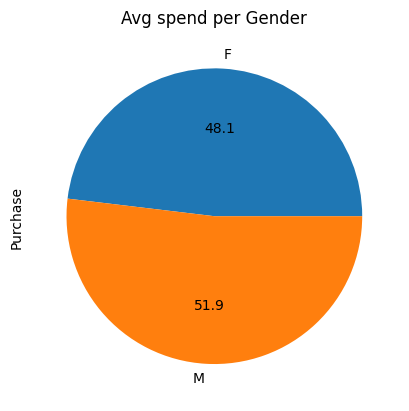

In [24]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie',autopct ='%.1f',title= "Avg spend per Gender")

### Age

No of product purchased in each age Category

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

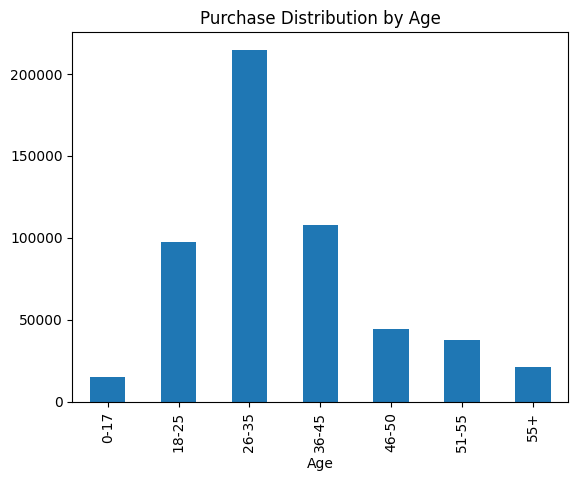

In [35]:
df.groupby('Age').size().plot(kind = 'bar',title="Purchase Distribution by Age")

No of unique product purchased in each age Category

In [42]:
df.groupby('Age')['Product_ID'].nunique()

Age
0-17     2300
18-25    3213
26-35    3419
36-45    3318
46-50    3099
51-55    2877
55+      2573
Name: Product_ID, dtype: int64

<Axes: title={'center': 'Unique products by Age'}, xlabel='Age'>

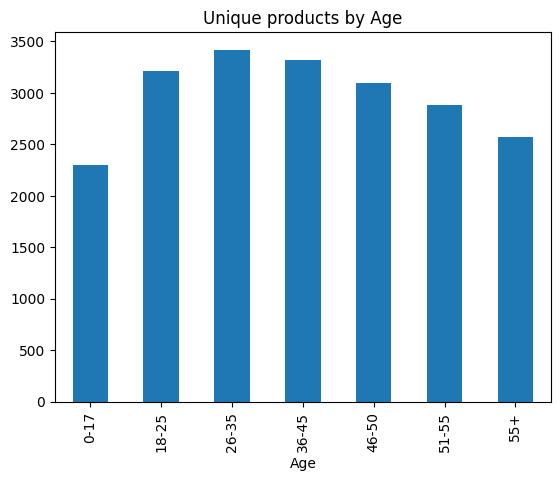

In [41]:
df.groupby('Age')['Product_ID'].nunique().plot(kind = 'bar',title="Unique products by Age")

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

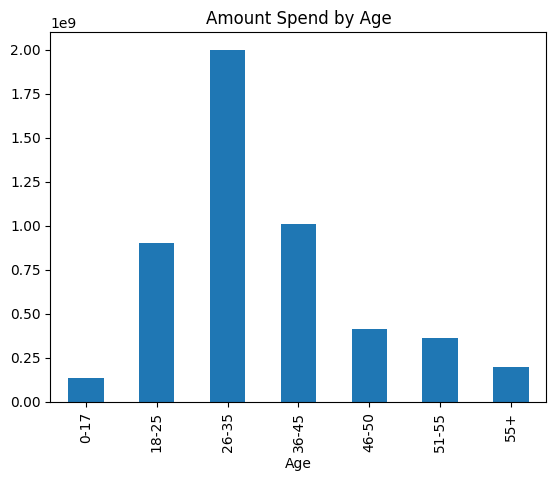

In [46]:
df.groupby('Age')["Purchase"].sum().plot(kind = 'bar',title="Amount Spend by Age")

Avg Amount Spend by Age

In [49]:
df.groupby('Age')["Purchase"].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<Axes: title={'center': 'Avg Amount Spend by Age'}, ylabel='Purchase'>

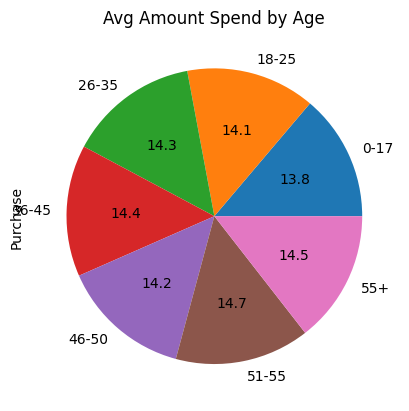

In [48]:
df.groupby('Age')["Purchase"].mean().plot(kind = 'pie',autopct = '%.1f',title="Avg Amount Spend by Age")

Total Purchase done from different city category

<Axes: xlabel='City_Category', ylabel='count'>

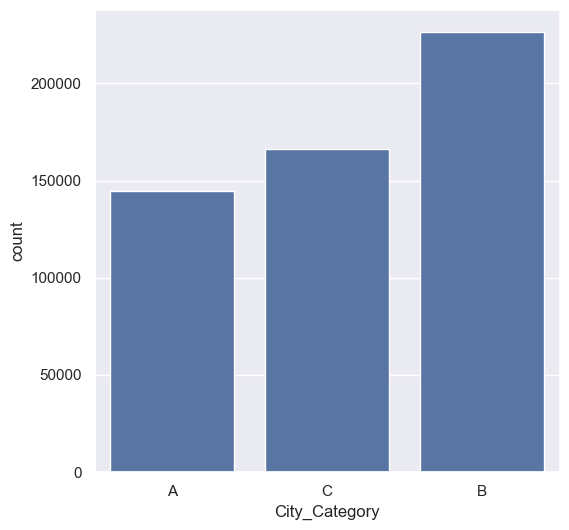

In [58]:
sns.countplot(x = df['City_Category'])

<Axes: >

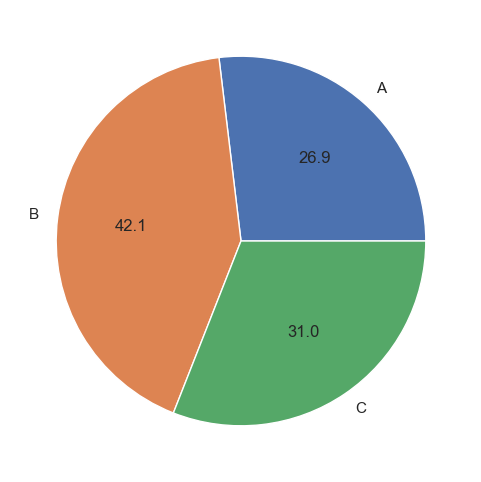

In [59]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

Sum of Purchase in each City Category 

<Axes: ylabel='Purchase'>

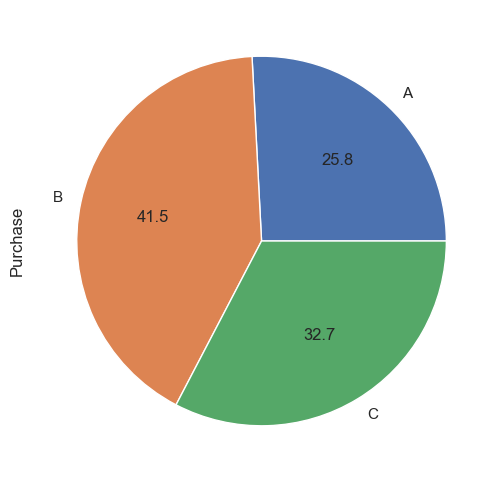

In [63]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

Avg of Purchase in each City Category 

<Axes: ylabel='Purchase'>

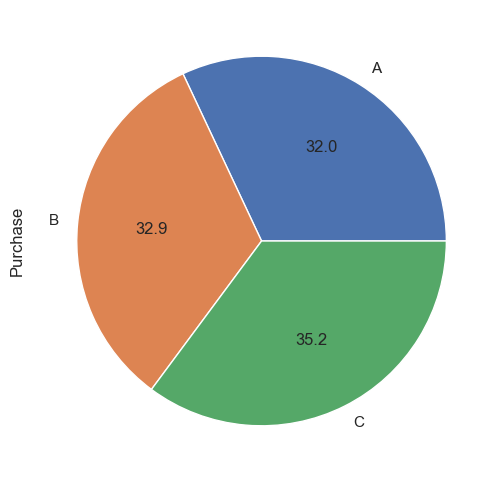

In [68]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

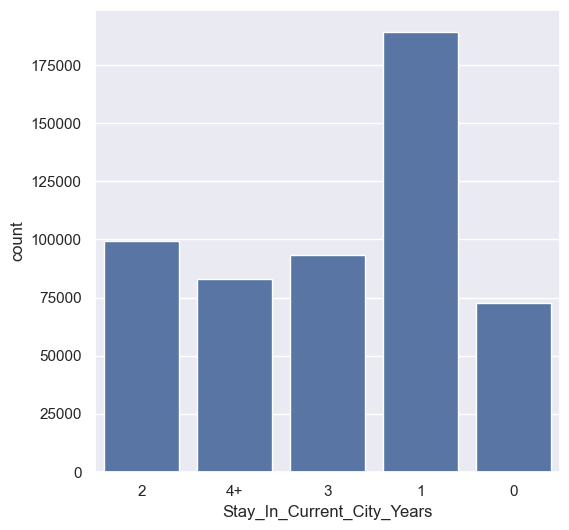

In [69]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

Total no of Purchase by each Occupation

<Axes: xlabel='Occupation'>

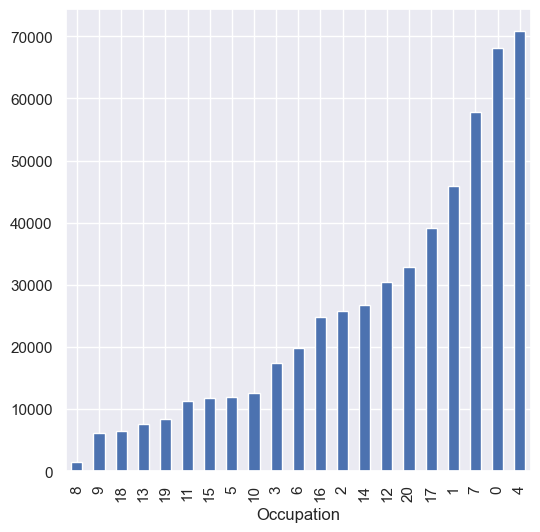

In [74]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

Total Sum Purchase by each Occupation

<Axes: xlabel='Occupation'>

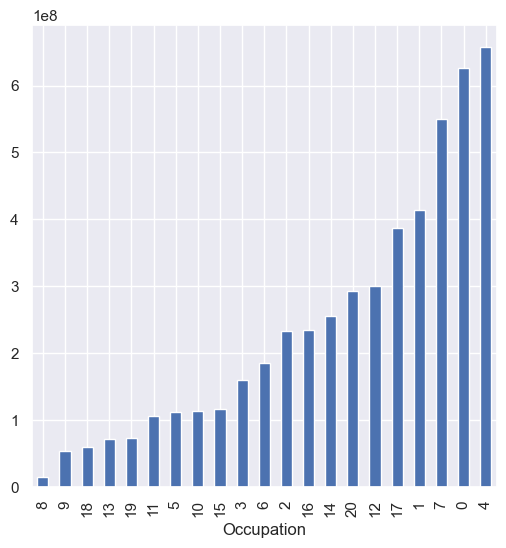

In [75]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

Avg Purchase by each Occupation

<Axes: xlabel='Occupation'>

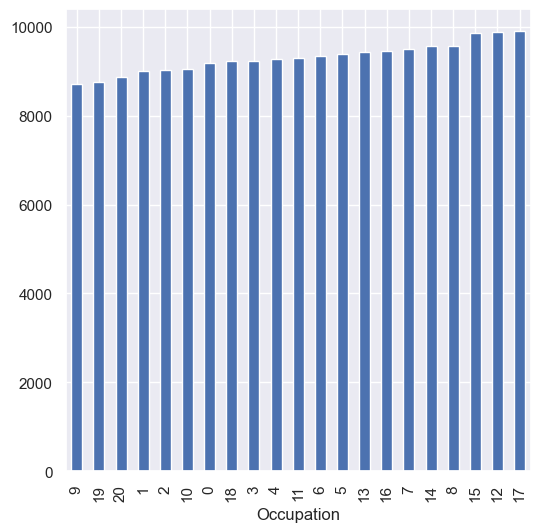

In [77]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

No of Unique product by each Occupation 

<Axes: xlabel='Occupation'>

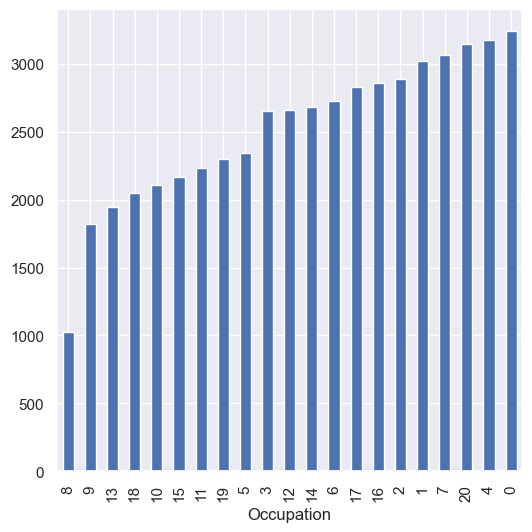

In [81]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

Total no of Purchase of each Product Category

<Axes: xlabel='Product_Category_1'>

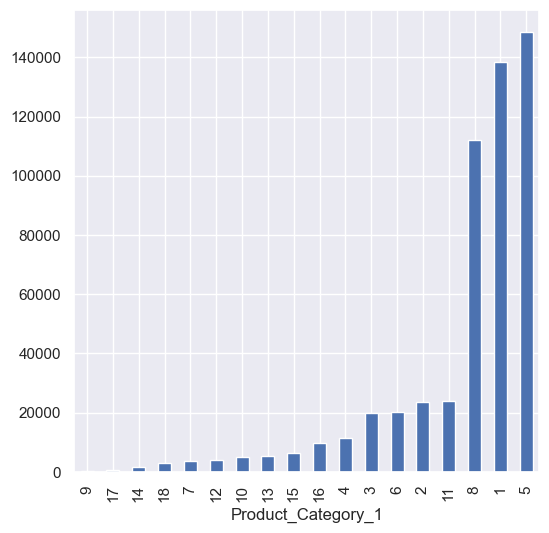

In [82]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

Total Spend on each Product Category

<Axes: xlabel='Product_Category_1'>

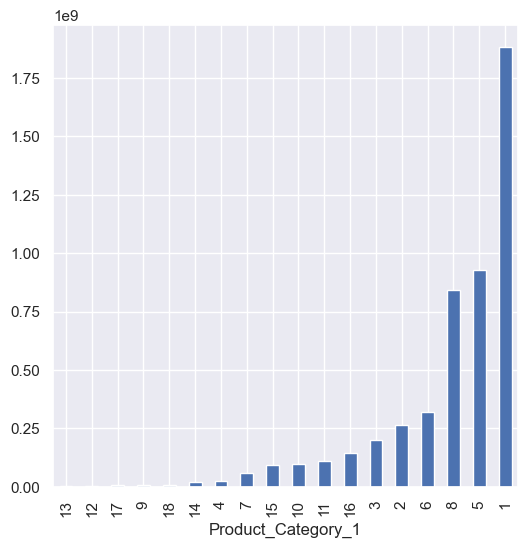

In [83]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

Avg Spend on each Product Category

<Axes: xlabel='Product_Category_1'>

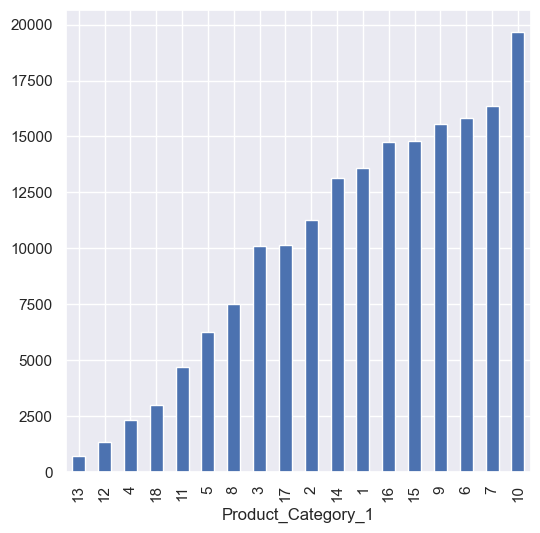

In [85]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

Top 10 Products in which highest amount of money is spend

<Axes: xlabel='Product_ID'>

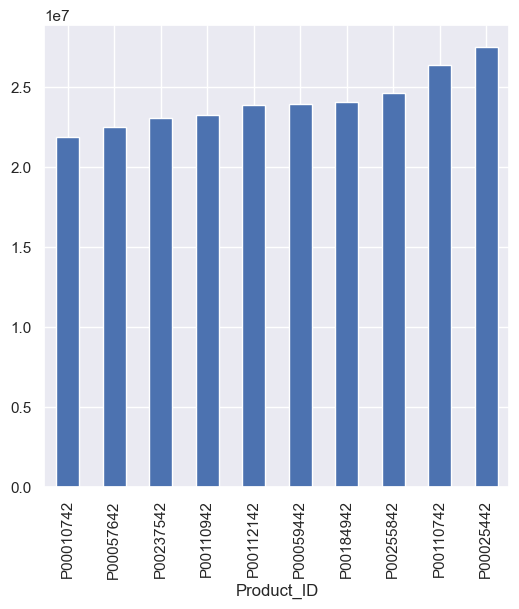

In [86]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

Top 10 Products by units sold

<Axes: xlabel='Product_ID'>

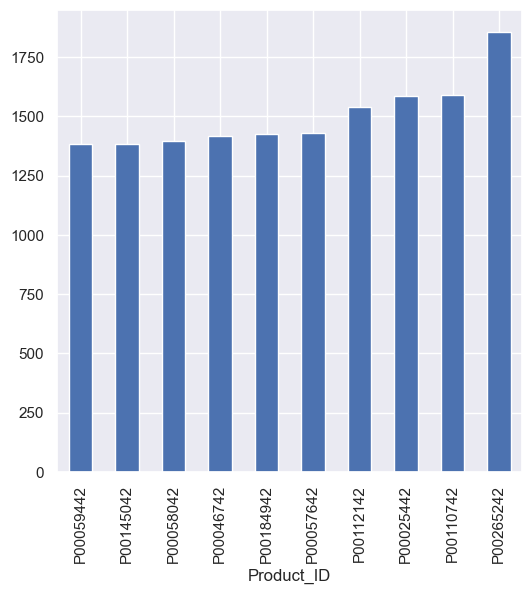

In [87]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

# Multivariate Analysis

Total Purchase done by different Genders in each Age category

<Axes: xlabel='Age', ylabel='count'>

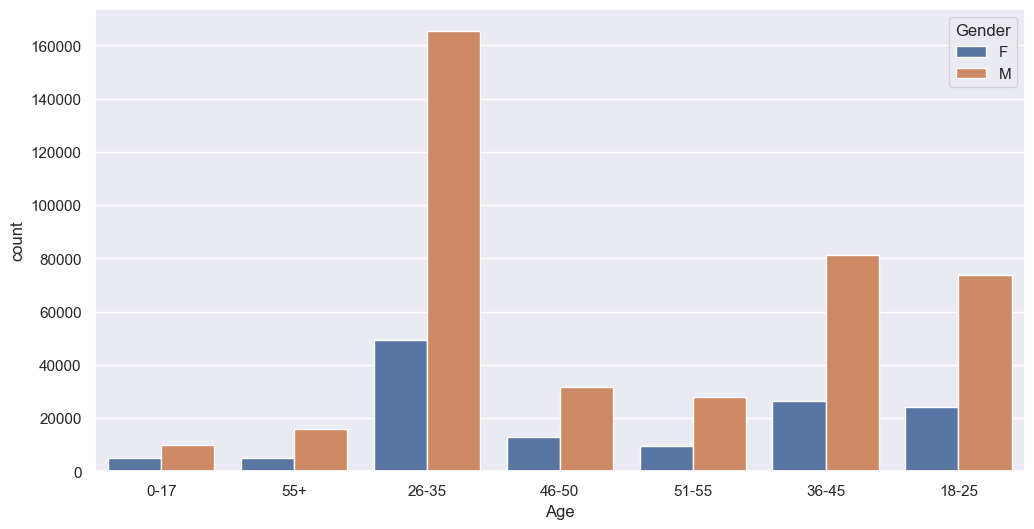

In [54]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

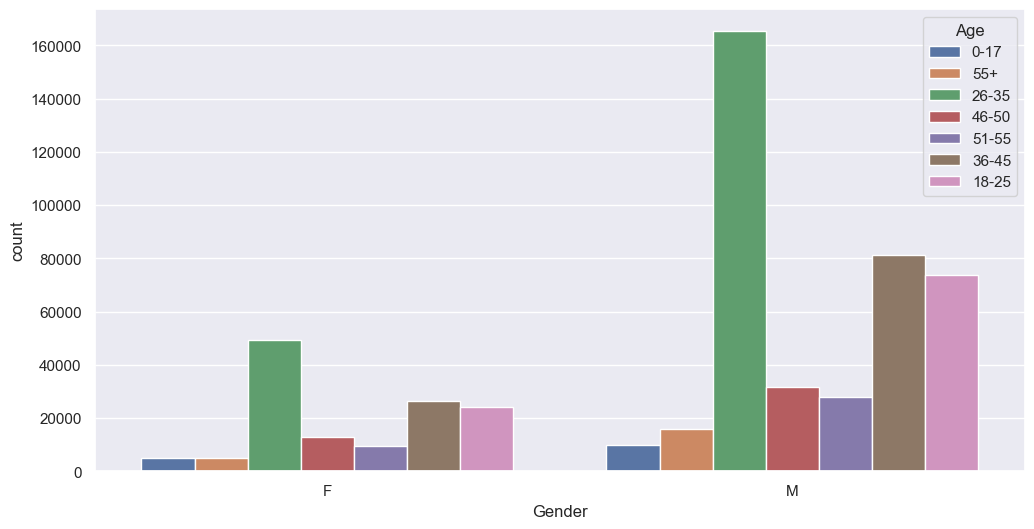

In [55]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

Total Purchase done by different Genders with different Marital Status

<Axes: xlabel='Gender', ylabel='count'>

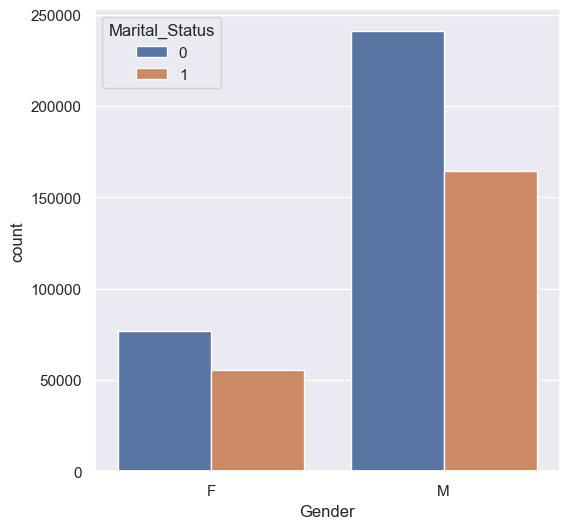

In [56]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x = "Gender", hue = 'Marital_Status', data = df)

City Category and Age

<Axes: xlabel='Age', ylabel='count'>

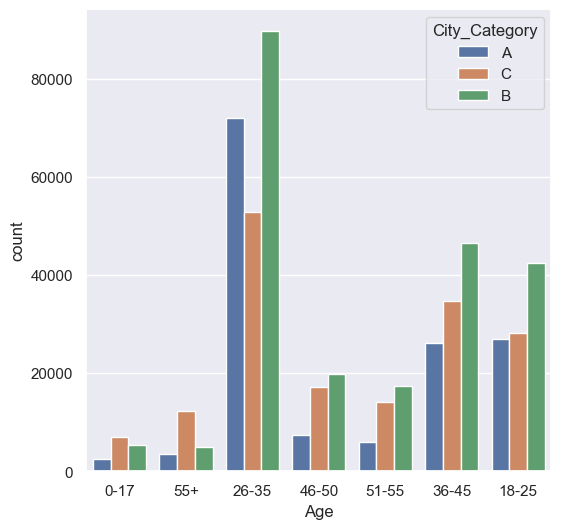

In [60]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

City Category and Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

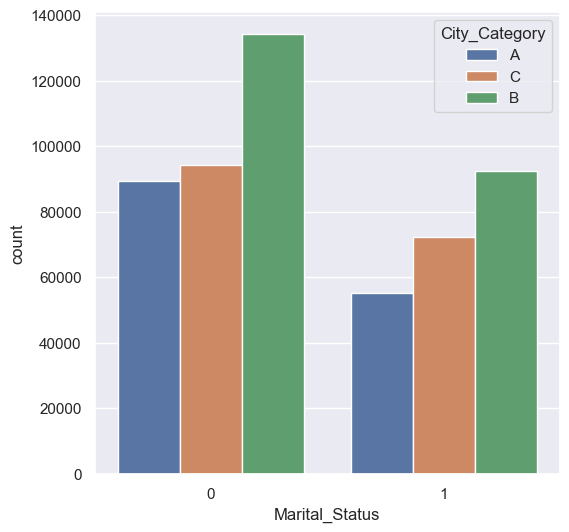

In [61]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

City Category and Gender

<Axes: xlabel='City_Category', ylabel='count'>

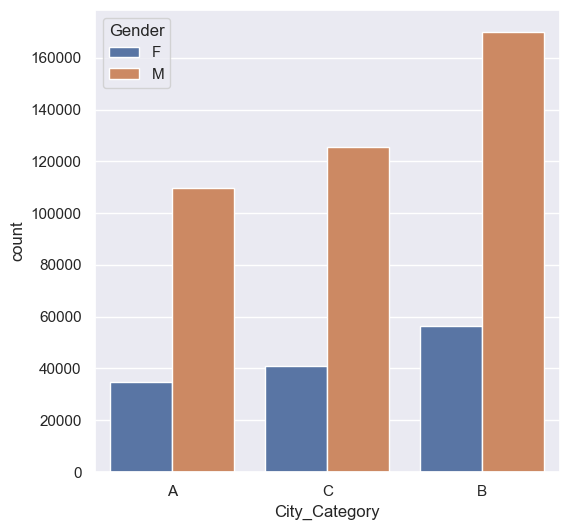

In [62]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

Stay in Current_City and Gender

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

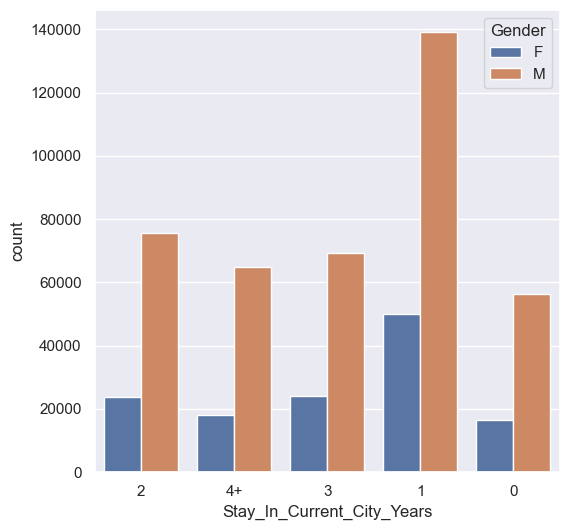

In [70]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

Stay in Current City and Marital Status

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

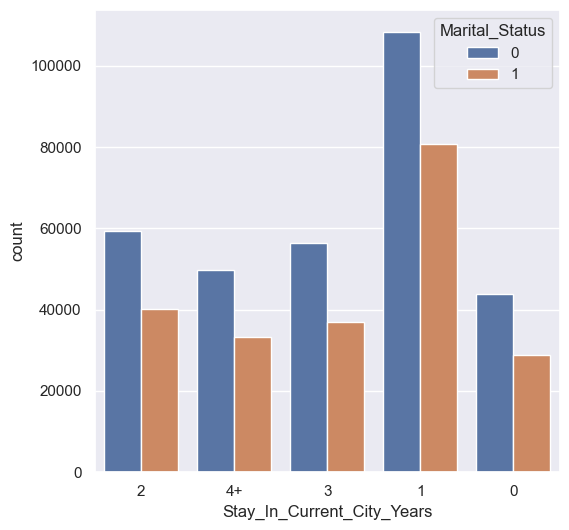

In [71]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

Stay in Current City and City Category

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

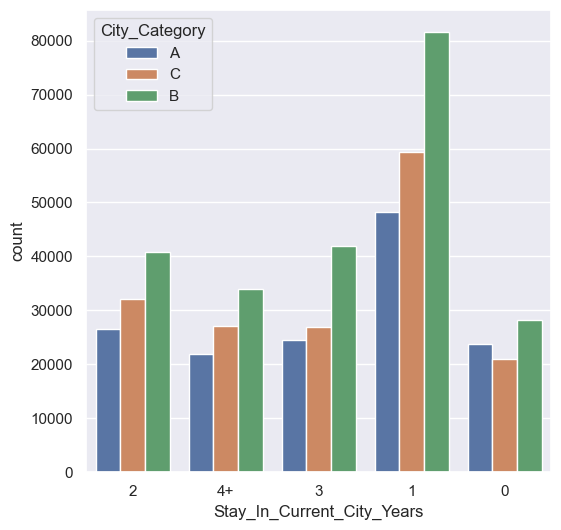

In [72]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

Occupation and Marital Status

<Axes: xlabel='Occupation', ylabel='count'>

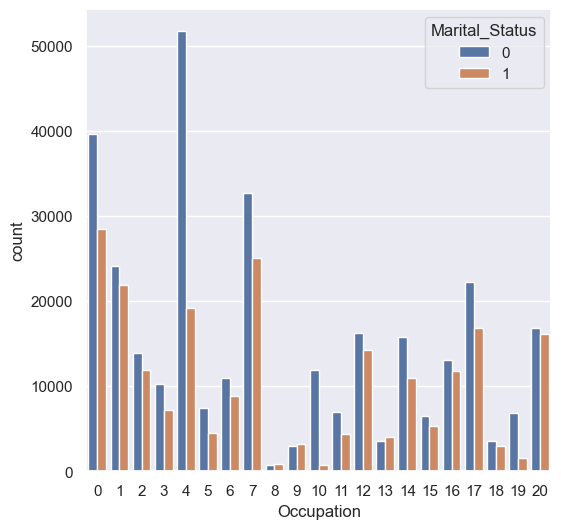

In [78]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

Occupation and Gender

<Axes: xlabel='Occupation', ylabel='count'>

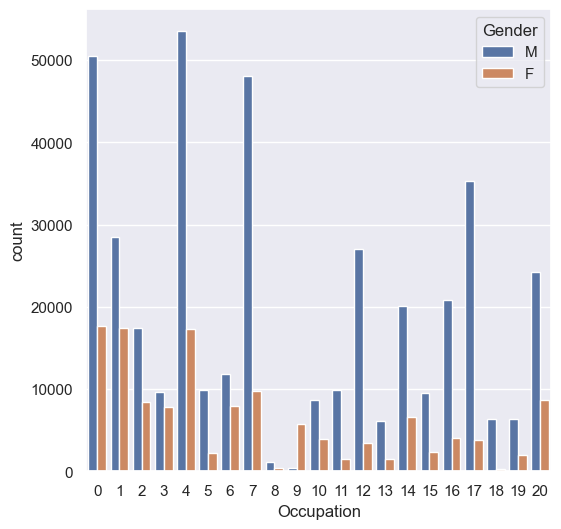

In [79]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

Product Category and Gender

<Axes: xlabel='Product_Category_1', ylabel='count'>

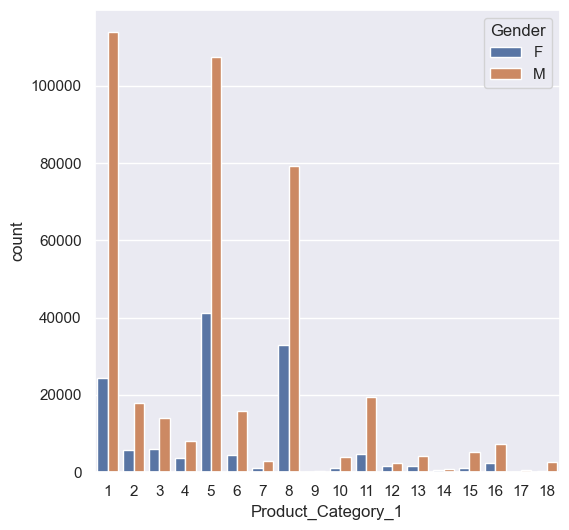

In [88]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)


Product Category and Marital Status

<Axes: xlabel='Product_Category_1', ylabel='count'>

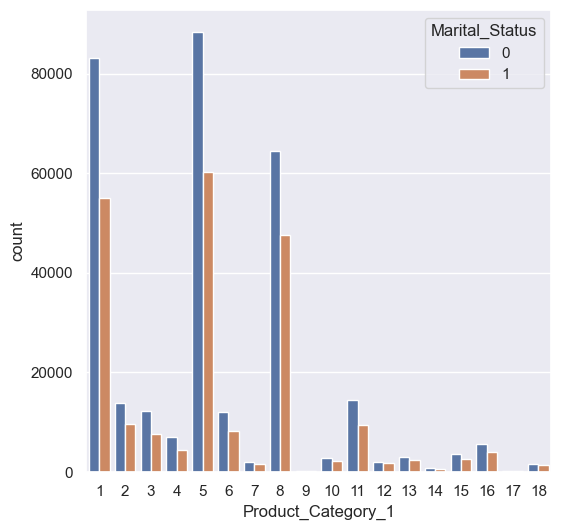

In [89]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)